In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
# s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_spec.txt', dtype=int)
# e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_error.txt', dtype=int)

s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_spec.txt', dtype=int)
#s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_error.txt', dtype=int)
#e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec_error.txt', dtype=int)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
# wavelengths
line = 1403.
wav = np.arange(line-10,line+10,0.01)

In [4]:
spec = s[6,:]
error = e[6,:]
res = fit2gauss(wav,spec,error,verbose=True)

est params =  [55.44714770579554, 1404.1660123296526, 0.1, 643.3575199955538, 1403.3523333498379, 0.1]
single peak found
only one peak still
new init params =  [788.0000000000002, 1403.4899999999905, 0.1, 394.0000000000001, 1403.2399999999905, 0.1]
a2g = [7.78928622e+02 1.40350049e+03 1.53941933e-01 2.24967625e+02
 1.40311867e+03 1.49940676e-01]
a1g[0] = 732.5755226428882
chi2g =  nan
a2g =  [7.78928622e+02 1.40350049e+03 1.53941933e-01 2.24967625e+02
 1.40311867e+03 1.49940676e-01]
chi1g =  nan
chi2g =  nan


/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:98: RuntimeWarning: divide by zero encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:98: RuntimeWarning: invalid value encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:162: RuntimeWarning: divide by zero encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:162: RuntimeWarning: invalid value encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)


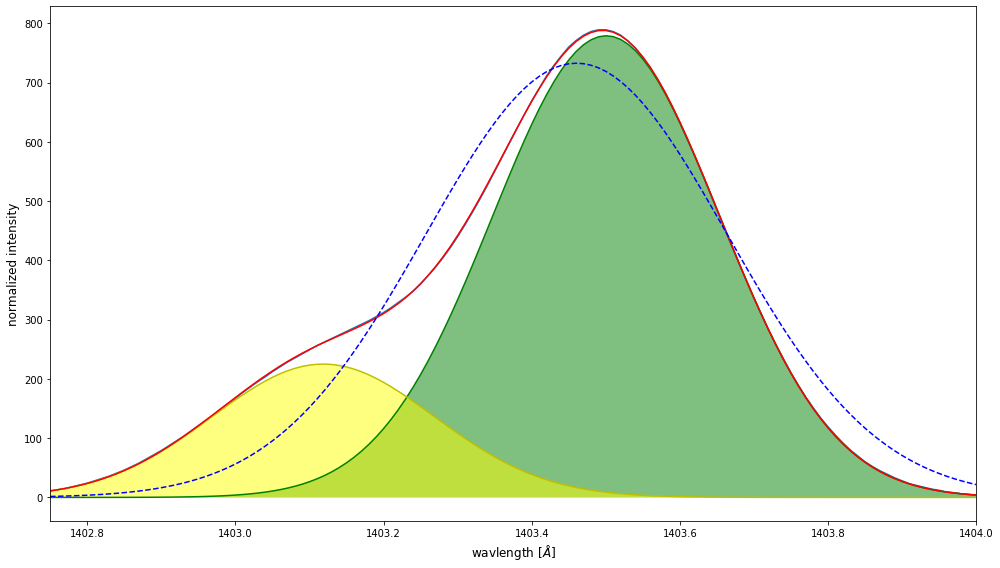

In [5]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [17]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  107.01793681202341 ----- "blue" velocity =  25.375813057483278


In [18]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  98.45695260978277


In [19]:
sig = a2g[2]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  32.922417660200644


test for peak finding.

In [9]:
from scipy.signal import find_peaks

In [10]:
spec_sm = savgol_filter(spec, 3, 1)
peaks, _ = find_peaks(spec_sm)

(1402.75, 1404)

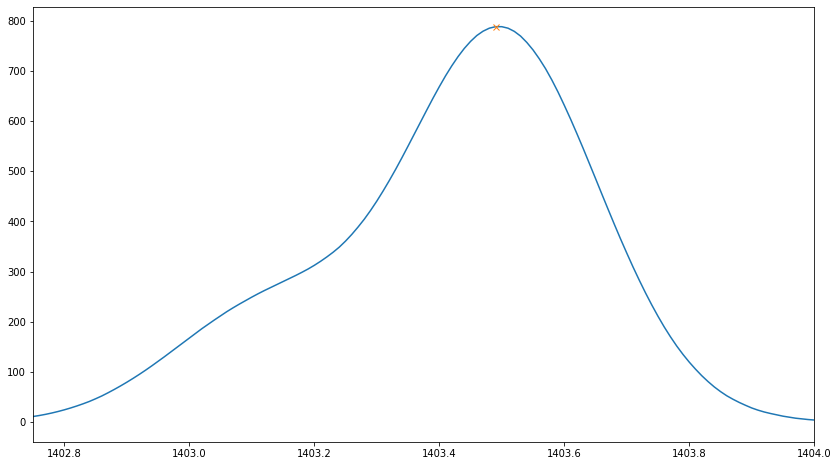

In [11]:
#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec_sm)
ax1.plot(wav[peaks], spec_sm[peaks], "x")
plt.xlim(1402.75,1404)

In [12]:
pos_peaks = wav[peaks]
spec_peaks = spec_sm[peaks]
iis = np.where(spec_peaks>0.1*np.max(spec))
iis = iis[0]

In [13]:
iis

array([0])

In [14]:
amp_peaks = spec_peaks[iis]

In [15]:
pos = pos_peaks[iis]

In [16]:
print('pos =', pos, 'amps = ', amp_peaks)

pos = [1403.49] amps =  [788.]
